In [47]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#Import the datetime module from datetime library
from datetime import datetime

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

#Starting URL for Weather Map API call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperialq=city&appid=" +weather_api_key

In [48]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

#can only unzip a zipped tuple once before it's removed from memory. Unzip to a list before moving on.

In [49]:
#Add the lat and long combinations to a list
coordinates = list (lats_lngs)

In [50]:
#Create a list for holding the cities
cities=[]

# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

647

In [51]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#Create the counters
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [52]:
# Loop through all the cities in our list:
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count +=1
        
    #Create end point URL with each city
    city_url = url+"&q="+city.replace(" ","+")
        
    #Log the URL, record, and set numbers in the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Increment record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        #Parse the JSON and retreive data
        city_weather=requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
    
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%y-%m-%d %H:%M:%S')
    
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    
    #If an error occurs, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of Set 1 | debre tabor
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | buchanan
Processing Record 4 of Set 1 | gaya
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vidalia
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | cabra
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | pese
Processing Record 16 of Set 1 | aswan
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | myslenice
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | ust-maya
Processing Record 21 of Set 1 | japura
Processing Record 22 of Set 1 | odweyne
Processing Record 23 of Set 1 | dingle
Processing Record 24 of Set 1 | mataura
Processing Record 25 of Set 1 | albany

Processing Record 193 of Set 4 | tiksi
Processing Record 194 of Set 4 | anastacio
Processing Record 195 of Set 4 | oeiras
Processing Record 196 of Set 4 | independence
Processing Record 197 of Set 4 | kieta
Processing Record 198 of Set 4 | marsa matruh
Processing Record 199 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 200 of Set 4 | grindavik
Processing Record 201 of Set 4 | santa maria
Processing Record 202 of Set 4 | lardos
Processing Record 203 of Set 4 | sobolevo
Processing Record 205 of Set 5 | kungurtug
Processing Record 206 of Set 5 | zhezkazgan
Processing Record 207 of Set 5 | staryy nadym
Processing Record 208 of Set 5 | lerwick
Processing Record 209 of Set 5 | san quintin
Processing Record 210 of Set 5 | ilulissat
Processing Record 211 of Set 5 | airai
Processing Record 212 of Set 5 | weihe
Processing Record 213 of Set 5 | opatovice nad labem
Processing Record 214 of Set 5 | anloga
Processing Record 215 of Set 5 | te anau
Processing Record 216 of Set 5 | c

Processing Record 382 of Set 8 | bambous virieux
Processing Record 383 of Set 8 | santa lucia
Processing Record 384 of Set 8 | owando
Processing Record 385 of Set 8 | wollongong
Processing Record 386 of Set 8 | gander
Processing Record 387 of Set 8 | los llanos de aridane
Processing Record 388 of Set 8 | tiznit
Processing Record 389 of Set 8 | najran
Processing Record 390 of Set 8 | vryburg
Processing Record 391 of Set 8 | naze
Processing Record 392 of Set 8 | mount isa
Processing Record 393 of Set 8 | oussouye
Processing Record 394 of Set 8 | hualmay
Processing Record 395 of Set 8 | san jose
Processing Record 396 of Set 8 | talnakh
Processing Record 397 of Set 8 | san patricio
Processing Record 398 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 399 of Set 8 | porto novo
Processing Record 400 of Set 8 | fortuna
Processing Record 401 of Set 8 | toyooka
Processing Record 402 of Set 8 | kemijarvi
Processing Record 403 of Set 8 | payakumbuh
Processing Record 404 of Set 

Processing Record 568 of Set 12 | ambon
Processing Record 569 of Set 12 | shahumyan
Processing Record 570 of Set 12 | mlimba
Processing Record 571 of Set 12 | blonduos
City not found. Skipping...
Processing Record 572 of Set 12 | bima
Processing Record 573 of Set 12 | puerto colombia
Processing Record 574 of Set 12 | kloulklubed
Processing Record 575 of Set 12 | la grande
Processing Record 576 of Set 12 | inongo
Processing Record 577 of Set 12 | dalvik
Processing Record 578 of Set 12 | melekhovo
Processing Record 579 of Set 12 | toliary
City not found. Skipping...
Processing Record 580 of Set 12 | san nicolas
Processing Record 581 of Set 12 | omboue
Processing Record 582 of Set 12 | harbour breton
Processing Record 583 of Set 12 | coffs harbour
Processing Record 584 of Set 12 | grand centre
City not found. Skipping...
Processing Record 585 of Set 12 | iisalmi
Processing Record 586 of Set 12 | oistins
Processing Record 587 of Set 12 | sochi
Processing Record 588 of Set 12 | ranfurly
Pro

In [53]:
#copnver the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Debre Tabor,11.8500,38.0167,283.41,72,12,2.37,ET,21-10-23 03:42:29
1,Hobart,-42.8794,147.3294,285.52,90,90,3.60,AU,21-10-23 03:41:08
2,Buchanan,5.8808,-10.0467,298.13,90,100,0.46,LR,21-10-23 03:42:30
3,Gaya,24.7833,85.0000,297.10,73,0,2.06,IN,21-10-23 03:42:30
4,Punta Arenas,-53.1500,-70.9167,277.10,86,47,13.57,CL,21-10-23 03:42:23
5,Rikitea,-23.1203,-134.9692,296.57,84,7,8.83,PF,21-10-23 03:42:30
6,Vidalia,32.2177,-82.4135,291.08,88,1,0.00,US,21-10-23 03:42:31
7,Yar-Sale,66.8333,70.8333,270.26,91,72,4.46,RU,21-10-23 03:42:31
8,Puerto Ayora,-0.7393,-90.3518,294.24,86,37,3.13,EC,21-10-23 03:42:31
9,Cape Town,-33.9258,18.4232,287.53,86,75,2.24,ZA,21-10-23 03:40:30


In [54]:
#New column order
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Debre Tabor,ET,21-10-23 03:42:29,11.8500,38.0167,283.41,72,12,2.37
1,Hobart,AU,21-10-23 03:41:08,-42.8794,147.3294,285.52,90,90,3.60
2,Buchanan,LR,21-10-23 03:42:30,5.8808,-10.0467,298.13,90,100,0.46
3,Gaya,IN,21-10-23 03:42:30,24.7833,85.0000,297.10,73,0,2.06
4,Punta Arenas,CL,21-10-23 03:42:23,-53.1500,-70.9167,277.10,86,47,13.57
5,Rikitea,PF,21-10-23 03:42:30,-23.1203,-134.9692,296.57,84,7,8.83
6,Vidalia,US,21-10-23 03:42:31,32.2177,-82.4135,291.08,88,1,0.00
7,Yar-Sale,RU,21-10-23 03:42:31,66.8333,70.8333,270.26,91,72,4.46
8,Puerto Ayora,EC,21-10-23 03:42:31,-0.7393,-90.3518,294.24,86,37,3.13
9,Cape Town,ZA,21-10-23 03:40:30,-33.9258,18.4232,287.53,86,75,2.24


In [55]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the output file
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [56]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

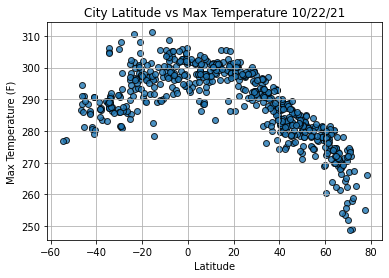

In [57]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()



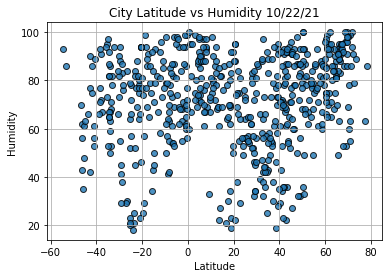

In [58]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()



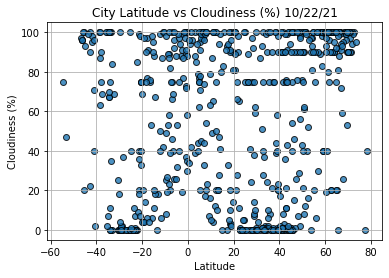

In [59]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()


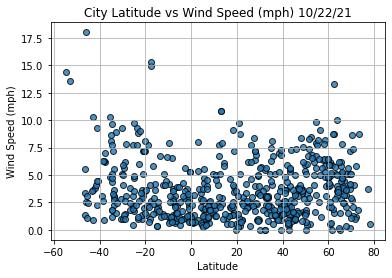

In [60]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [61]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data

def plot_linear_regression (x_values,y_values,title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope,intercept,r_value,p_value, std_err) = linregress(x_values,y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [62]:
index13 = city_data_df.loc[13]
index13

City                 Butaritari
Country                      KI
Date          21-10-23 03:42:33
Lat                      3.0707
Lng                    172.7902
Max Temp                 301.21
Humidity                     75
Cloudiness                   88
Wind Speed                  8.0
Name: 13, dtype: object

In [63]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

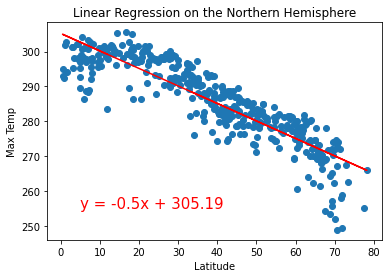

In [64]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Northern Hemisphere", "Max Temp", (5,255))

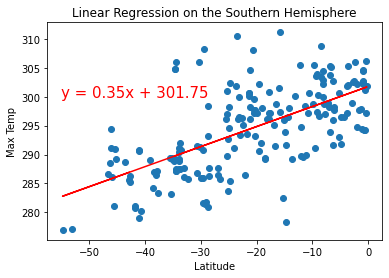

In [71]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Southern Hemisphere", "Max Temp", (-55,300))

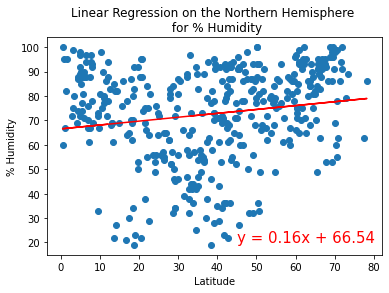

In [72]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (45,20))

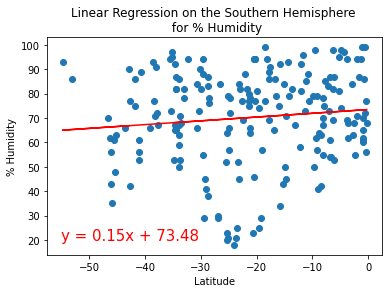

In [73]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-55,20))

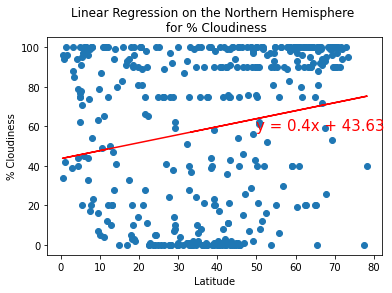

In [74]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (50,58))

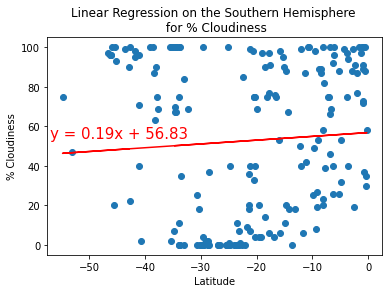

In [77]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-57,54))

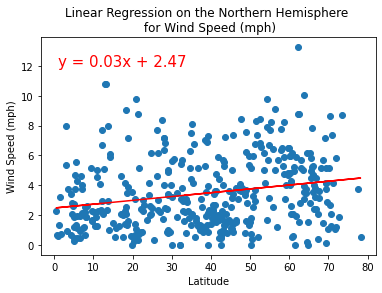

In [78]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)", "Wind Speed (mph)", (1,12))

In [ ]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression (x_values,y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)", "Wind Speed (mph)", (-57,30))